In [4]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [8]:
df.shape

(53940, 10)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
X = df.drop(["cut"], axis=1)
y = df["cut"]

In [12]:
X.head()

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test =train_test_split(X_encoded, y, test_size=0.2, random_state=42)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_hat = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_hat))

Accuracy: 0.5507044864664442


In [15]:
y_hat.shape

(10788,)

In [16]:
y.value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [17]:
X_test.shape

(10788, 22)

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [80]:
le = LabelEncoder()
df['clarity'] = le.fit_transform(df['clarity'])
df['color'] = le.fit_transform(df['color'])

In [82]:
X = df.drop(["cut"], axis=1)
y = df["cut"]

In [84]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [86]:
y_categorical

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size= 0.2, random_state=42)

In [90]:
y_categorical.shape

(53940, 5)

In [92]:
y_categorical[5]

array([0., 0., 0., 0., 1.])

In [94]:
y[5]

'Very Good'

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [186]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential([
    Dense(27, activation = 'relu',),
    Dense(68, activation='relu'),
    Dropout(0.3),
    Dense(36, activation='relu'),
    Dense(5, activation='softmax')
    ])

In [188]:
early_stop= EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights=True,
    verbose=1
)


In [190]:
model_check = ModelCheckpoint(
    'car_model.keras',
    monitor = 'accuracy',
    save_best_only=True,
    verbose=1)

In [192]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [194]:
history = model.fit(
    X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=64, callbacks=[early_stop, model_check], verbose=1)

Epoch 1/100
538/540 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5372 - loss: 1.1825
Epoch 1: accuracy improved from -inf to 0.61351, saving model to car_model.keras
540/540 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5376 - loss: 1.1815 - val_accuracy: 0.6868 - val_loss: 0.8186
Epoch 2/100
530/540 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6839 - loss: 0.8215
Epoch 2: accuracy improved from 0.61351 to 0.68842, saving model to car_model.keras
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6840 - loss: 0.8213 - val_accuracy: 0.7036 - val_loss: 0.7761
Epoch 3/100
534/540 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6976 - loss: 0.7791
Epoch 3: accuracy improved from 0.68842 to 0.69740, saving model to car_model.keras
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6976 - loss: 0.7792 - val_accuracy: 0.7107 - val_loss: 0.7652
Epoch 4/100
536/540 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7042 - loss: 0.7751
Epoch 4: accuracy improved from 0.69740 to 0.70464

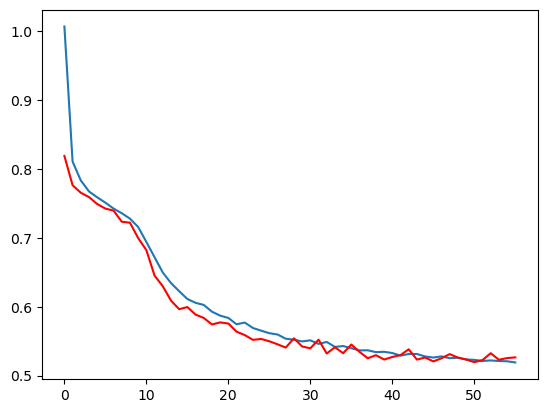

In [196]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], color='red')